# Comparison of Corsort variants

This notebook shows how to use the `corsort` package to compare different variants of Corsorts. In details we tested the following possibilities:

- Internal scorer: $\Delta$ or $\rho$
- Information measure: $I(i)+I(j)$ or $\max(I(i), I(j))$
- External scorer: $\Delta$ or $\rho$

There are much more variants available. We restrain to these 8 for conciseness.

First we load some packages.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from multiprocess.pool import Pool

from corsort import *

We populate the list of corsorts we want to study.

In [2]:
sort_list = [
    JitCorsortDeltaSumDelta(compute_history=True),
    JitCorsortDeltaMaxDelta(compute_history=True),
    JitCorsortRhoSumDelta(compute_history=True),
    JitCorsortRhoMaxDelta(compute_history=True),
    JitCorsortRhoSumRho(compute_history=True),
    JitCorsortRhoMaxRho(compute_history=True),
    JitCorsortDeltaSumRho(compute_history=True),
    JitCorsortDeltaMaxRho(compute_history=True)]
legends = {'corsort_delta_sum_delta': r'Corsort-$\Delta\sum$ $\Delta$',
 'corsort_delta_max_delta': r'Corsort-$\Delta$Max $\Delta$',
 'corsort_rho_sum_delta': r'Corsort-$\rho\sum$ $\Delta$',
 'corsort_rho_max_delta': r'Corsort-$\rho$Max $\Delta$',
 'corsort_rho_sum_rho': r'Corsort-$\rho\sum$ $\rho$',
 'corsort_rho_max_rho': r'Corsort-$\rho$Max $\rho$',
 'corsort_delta_sum_rho': r'Corsort-$\Delta\sum$ $\rho$',
 'corsort_delta_max_rho': r'Corsort-$\Delta$Max $\rho$'}

We decide the value of $n$ to study and the number of trials.

In [3]:
n = 500
nt = 10000

We now run the experiments, with some multi-processing to speed-up things.

In [4]:
with Pool() as p:
    convergence = evaluate_convergence(sort_list=sort_list, n=n, nt=nt, pool=p)

Evaluate convergence of corsort_delta_sum_delta for n = 500


100%|██████████| 10000/10000 [28:06<00:00,  5.93it/s] 


Evaluate convergence of corsort_delta_max_delta for n = 500


100%|██████████| 10000/10000 [27:59<00:00,  5.96it/s] 


Evaluate convergence of corsort_rho_sum_delta for n = 500


100%|██████████| 10000/10000 [30:50<00:00,  5.40it/s] 


Evaluate convergence of corsort_rho_max_delta for n = 500


100%|██████████| 10000/10000 [30:01<00:00,  5.55it/s] 


Evaluate convergence of corsort_rho_sum_rho for n = 500


100%|██████████| 10000/10000 [31:49<00:00,  5.24it/s] 


Evaluate convergence of corsort_rho_max_rho for n = 500


100%|██████████| 10000/10000 [30:45<00:00,  5.42it/s] 


Evaluate convergence of corsort_delta_sum_rho for n = 500


100%|██████████| 10000/10000 [28:10<00:00,  5.91it/s] 


Evaluate convergence of corsort_delta_max_rho for n = 500


100%|██████████| 10000/10000 [27:48<00:00,  5.99it/s] 


We save the raw results.

In [5]:
import dill as pickle
from pathlib import Path

fn = Path(f"corsorts_n_{n}_nt_{nt}.pkl")
if fn.exists():
    with open(fn, 'rb') as f:
        convergence = pickle.load(f)
else:
    with open(fn, 'wb') as f:
        pickle.dump(convergence, f)

Then we display the results.

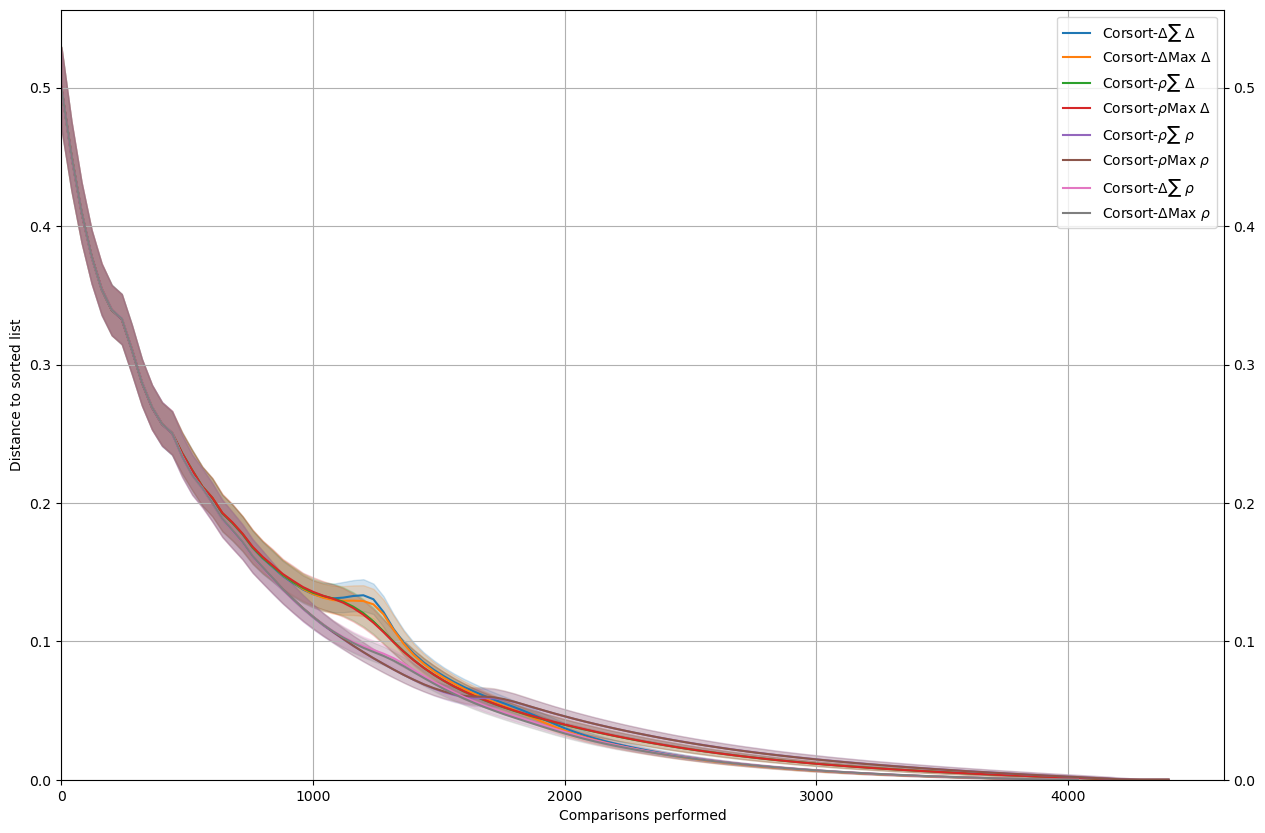

In [6]:
m = n*(n-1)/2
fig = plt.figure(figsize=(15, 10))
ax = plt.axes()
decim=40
color_dict = auto_colors(sort_list)
for name in legends:
    ref = convergence[name]
    color = color_dict[name]
    p_m = ref.shape[1]
    x = np.arange(p_m)[::decim]
    ref = ref[:, ::decim]
    q = np.zeros((5, ref.shape[1]))
    for i, per in enumerate([2.5, 50, 97.5]):
        q[i, :] = np.percentile(ref, per, axis=0)
    q = q/m
    ax.plot(x, q[1, :], label=legends[name], color=color)
    ax.fill_between(x, q[0, :], q[2, :], alpha=.2, color=color)
plt.legend()
plt.grid()
ax.tick_params(labelright=True, right=True)
plt.ylabel('Distance to sorted list')
plt.xlabel('Comparisons performed')
plt.ylim([0, None])
plt.xlim([0, None])
plt.show()

Quick interpretation :

- `max` and `plus` variants (for measure of information) are very close to each other, with a slight advantage to `max`.
- Using a $\Delta$ external scorer creates a kind of bump. The $\rho$ external scorer does not have this issue.
- Most of the time (the exception been around the `bump` from previous item), the $\Delta$ internal scorer is better.

In the end, we selected Corsort-$\Delta$Max $\rho$:

- Internal scorer: $\Delta$
- Information measure: $\max(I(i), I(j))$
- External scorer: $\rho$